In [1]:
import pandas as pd
from GA import GA
import numpy as np
import re
import os

In [2]:
stacking = False
with_meta = False
single_enc_struc = False
small = True
# fold = "Run10/both/"
fold = 'self1/both/imo_' #Vax1
#fold = "Run10/both/"
#fold = "self3/both/" #Vax7
#fold='self_last/seq/'


data_source = 'imo'
save_plots = False
save_eval = False
save_extra = False


sep = ';'
header = None

N_CLF = 4
POPSIZE = 40
if small:
    N_CLF = 2
    POPSIZE = 30
filename = fold+'population_details.csv'
if stacking and with_meta:
    meta = pd.read_csv("Results/Stacking/"+fold+"meta_cls.csv").iloc[:,1]

N_ENC = len(os.listdir('data/'+data_source+'/sequence_based'))+len(os.listdir('data/'+data_source+'/structure_based'))


### Import raw data from ga.py run

In [3]:
if stacking:
    stack = 'Stacking'
else:
    stack = 'NoStacking'

df =  pd.read_csv("Results/"+stack+"/"+filename, sep=sep, header=header)
print(len(df))

CLSs = ["cls"+str(i) for i in range(N_CLF)]
SCMs = ["SVM_C"+str(i) for i in range(N_CLF)]
RF = ["RF_n"+str(i) for i in range(N_CLF)]
Gs = ["SVM_gamma"+str(i) for i in range(N_CLF)]
ENCs = ["encoding"+str(i) for i in range(N_CLF)]

if header == None:
        df.columns = ["gen","individual","fitness"]+CLSs+SCMs+RF+Gs+ENCs
 
"""
    
    df.columns = ["gen","individual","fitness","cls0","cls1","cls2","cls3","RF_n0",
                  "RF_n1","RF_n2","RF_n3","SVM_C0","SVM_C1","SVM_C2","SVM_C3","SVM_gamma0",
                  "SVM_gamma1","SVM_gamma2","SVM_gamma3","encoding0","encoding1","encoding2","encoding3"]
"""

print(np.where(pd.isnull(df)))


#dele = []
#for i in range(len(df.iloc[:,2])):
#    if str(df.iloc[i,2])=="nan":
#        dele.append(i)
#df.drop(dele,inplace=True)
#print(len(dele))

if stacking and with_meta:
   df['meta_classifier'] = meta

all_fit_div = []
i=0
for x in df.iloc[:,2]:
    i+=1
    fit_div = re.findall("0.\d*",x)
    try:
        fit_div = [float(x) for x in fit_div]
    except ValueError:
        try:
            fit_div = [1.0,float(fit_div[1])]
        except ValueError:
            fit_div = [float(fit_div[0]),0.223]
    all_fit_div.append(fit_div)

df1 = pd.DataFrame(all_fit_div)

#df = df.assign(fitness_value= df1[0])
df['fitness_value'] = pd.Series(df1[0], index=df.index)
df['diversity'] = pd.Series(df1[1], index=df.index)
df.set_index(["gen","individual"], verify_integrity=False,inplace = True)
del df["fitness"]
cols = list(df.columns)
new_c = [cols[-2]]+ cols[:-2] + [cols[-1]]

#df['fitness_value'].to_csv('test.csv')
df = df[new_c]
#df = df.drop(df.index[[range(600*40,len(df))]])

df2 = df.copy(deep=True)

for i in range(N_CLF):
    del df["cls"+str(i)]
    del df["encoding"+str(i)]

df2


27394
(array([    0,     1,     2, ..., 27391, 27392, 27393]), array([5, 5, 5, ..., 6, 6, 6]))


fitness_value cls0 cls1  SVM_C0  SVM_C1     RF_n0     RF_n1  \
gen individual                                                                
1   0                0.791745  svm   rf     NaN   145.0  0.416200  0.000000   
    1                0.791187  svm   rf     NaN   112.0  0.532093  0.000000   
    2                0.829107  svm   rf     NaN   110.0  0.418276  0.000000   
    3                0.784836  svm   rf     NaN   145.0  0.532093  0.000000   
    0                0.905443  svm  svm     NaN     NaN  0.584728  0.607381   
...                       ...  ...  ...     ...     ...       ...       ...   
913 25               0.944923   rf  svm   161.0     NaN  0.000000  1.097233   
    26               0.947412   rf  svm   151.0     NaN  0.000000  1.187464   
    27               0.943437   rf  svm   143.0     NaN  0.000000  1.129956   
    28               0.941412   rf  svm   166.0     NaN  0.000000  1.218534   
    29               0.929219   rf  svm   160.0     NaN  0.000000  1.238569   

                SVM_gamma0  SVM_gamma1                       encoding0  \
gen individual                                                           
1   0                    0           0        electrostatic_hull_9.csv   
    1                    0           0                        ssec.csv   
    2                    0           0        electrostatic_hull_9.csv   
    3                    0           0                        ssec.csv   
    0                    0           0     delaunay_total_distance.csv   
...                    ...         ...                             ...   
913 25                   0           0  delaunay_cartesian_product.csv   
    26                   0           0  delaunay_cartesian_product.csv   
    27                   0           0   delaunay_number_instances.csv   
    28                   0           0  delaunay_cartesian_product.csv   
    29                   0           0   delaunay_number_instances.csv   

                                  encoding1  diversity  
gen individual                                          
1   0           flgc_aaindex_KUMS000103.csv   0.337307  
    1                              gaac.csv   0.423313  
    2                              ctdd.csv   0.272652  
    3           flgc_aaindex_KUMS000103.csv   0.429167  
    0                        ngram_e2_5.csv   0.169199  
...                                     ...        ...  
913 25                              dde.csv   0.127212  
    26                              dde.csv   0.127212  
    27                              dde.csv   0.123127  
    28                              dde.csv   0.127212  
    29             dist_freq_dn_20_dc_5.csv   0.091241  

[27394 rows x 12 columns]

In [4]:
"""
stack = "Stacking"
filename = "self1/fitdiv500Stack2510_withMeta.csv"
df =  pd.read_csv("Results/"+stack+"/"+filename, sep=sep, header=None)
df = df.drop(df.index[0])
df.columns = ["gen","individual","fitness_value","cls0","cls1","cls2","cls3","RF_n0",
                  "RF_n1","RF_n2","RF_n3","SVM_C0","SVM_C1","SVM_C2","SVM_C3","SVM_gamma0",
                  "SVM_gamma1","SVM_gamma2","SVM_gamma3","encoding0","encoding1","encoding2","encoding3","diversity","meta_classifier"]
df.set_index(["gen","individual"], verify_integrity=False,inplace = True)
df2 = df.copy(deep=True)


for i in range(N_CLF):
    del df["cls"+str(i)]
    del df["encoding"+str(i)]
df
"""

'\nstack = "Stacking"\nfilename = "self1/fitdiv500Stack2510_withMeta.csv"\ndf =  pd.read_csv("Results/"+stack+"/"+filename, sep=sep, header=None)\ndf = df.drop(df.index[0])\ndf.columns = ["gen","individual","fitness_value","cls0","cls1","cls2","cls3","RF_n0",\n                  "RF_n1","RF_n2","RF_n3","SVM_C0","SVM_C1","SVM_C2","SVM_C3","SVM_gamma0",\n                  "SVM_gamma1","SVM_gamma2","SVM_gamma3","encoding0","encoding1","encoding2","encoding3","diversity","meta_classifier"]\ndf.set_index(["gen","individual"], verify_integrity=False,inplace = True)\ndf2 = df.copy(deep=True)\n\n\nfor i in range(N_CLF):\n    del df["cls"+str(i)]\n    del df["encoding"+str(i)]\ndf\n'

### Split fitness scores into top and bottom half (Later promoted/ killed)

In [5]:
%%time

POPSIZE_HALF = int(POPSIZE/2)


top_fit = df.fitness_value.groupby(['gen']).apply(lambda group: list(group.astype(float).nlargest(POPSIZE_HALF)))
bot_fit = df.fitness_value.groupby(['gen']).apply(lambda group: list(group.astype(float).nsmallest(POPSIZE_HALF)))

top_groups = df[['fitness_value','diversity']].groupby(['gen']).apply(lambda group: group.nlargest(POPSIZE_HALF,'fitness_value'))
bot_groups = df[['fitness_value','diversity']].groupby(['gen']).apply(lambda group: group.nsmallest(POPSIZE_HALF,'fitness_value'))

mean_top_div = top_groups.groupby(['gen'])['diversity'].mean()
mean_bot_div = bot_groups.groupby(['gen'])['diversity'].mean()

mean_top_fit = top_groups.groupby(['gen'])['fitness_value'].mean()
mean_bot_fit = bot_groups.groupby(['gen'])['fitness_value'].mean()

top_div = top_groups['diversity'].groupby(['gen']).apply(lambda group: list(group.astype(float)))
bot_div = bot_groups['diversity'].groupby(['gen']).apply(lambda group: list(group.astype(float)))

CPU times: user 3.63 s, sys: 42.2 ms, total: 3.67 s
Wall time: 3.68 s


In [2]:
import pandas as pd
df = pd.read_csv("/Users/amvaon/Documents/Work/S&F/bestellungen2020_cleaned.csv",sep=';',engine='python')
#df = pd.read_csv("/Users/amvaon/Documents/Work/S&F/bestellungen2020.csv",sep=',',engine='python')
print(len(df))

ship_to = df.groupby(['Ship To City']).first()[['Ship To Postal Code','Ship To State','Ship To Country']]

ship_from = df.groupby(['Ship From City']).first()[['Ship From Postal Code','Ship From State','Ship From Country']]

ship_from.to_csv("/Users/amvaon/Documents/Work/S&F/ship_from.csv")
ship_to.to_csv("/Users/amvaon/Documents/Work/S&F/ship_to.csv")


print(ship_to)
print(ship_from)

62429
                                 Ship To Postal Code      Ship To State  \
Ship To City                                                              
's-Gravenpolder                               4431AR                NaN   
's-Gravenwezel                                  2970                NaN   
00128 Roma                                       128               Roma   
01400 - CHATILLON SUR CHALARONNE                1400                NaN   
03726 BENITACHELL                               3726         / ALICANTE   
...                                              ...                ...   
‹berherrn                                      66802           Saarland   
‹berlingen                                     88662  Baden-Württemberg   
‹chtelhausen                                   97532             Bayern   
‹hlingen-Birkendorf                            79777  Baden-Württemberg   
‹rzig                                          54539                NaN   

                  

### Count the mean fraction of random forest classifiers used

In [6]:
rfcount = (df2[df2.columns[1:N_CLF+1]].replace('svm',pd.np.nan).count(axis=1)/N_CLF).groupby(["gen"]).mean()

### Count how often each encoding (and metaclassifier) was used

In [7]:

encoding_counts = pd.Series.value_counts(df2[[('encoding{}'.format(i)) for i in range(N_CLF)]].values.ravel())
encoding_counts_struc = pd.Series.value_counts(df2[[('encoding{}'.format(i)) for i in range(0,N_CLF,2) ] ].values.ravel())
encoding_counts_seq = pd.Series.value_counts(df2[[('encoding{}'.format(i)) for i in range(1,N_CLF,2) ] ].values.ravel())

if stacking and with_meta:
    meta_counts = pd.Series.value_counts(df2["meta_classifier"].values.ravel())

In [8]:
top_encoding_counts = [df2.groupby(['gen']).apply(lambda group: pd.Series.value_counts(
    group[['encoding{}'.format(i) for i in range(N_CLF)]].values.ravel()).
                        get(encoding_counts.index[i]))/N_ENC for i in range(N_CLF)]

if stacking and with_meta:
    top_meta_clf_counts = [df2.groupby(['gen']).apply(lambda group: pd.Series.value_counts(
        group["meta_classifier"].values.ravel()).
                            get(meta_counts.index[i]))/N_ENC for i in range(N_CLF)]

### Calculate Shannon Entropy on (the variety of) Encodings used

In [9]:
def shannon(a):
    """
    Computes shannon Entropie for a vector of categorial variables
    """
    freqs = pd.Series.value_counts(a)/len(a)
    return -1*np.sum([freq * np.log(freq) for freq in freqs])/np.log(len(a))
df2.keys()
shannon_entropy_encoding = df2[['encoding{}'.format(i) for i in range(N_CLF)]]\
.groupby(['gen']).apply(lambda group: shannon(group.values.ravel()))
if stacking and with_meta:
    shannon_entropy_meta_cls = df2[['meta_classifier']]\
    .groupby(['gen']).apply(lambda group: shannon(group.values.ravel()))

In [10]:
assert len([[i]*int(len(df2.index.levels[1])/2) for i in df2.index.levels[0]])==len(top_fit)

## Plot of all generations, their fitness, diversity, RF fraction, Encodings fraction, (Entropy)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_and_save(add,params):
    f1,moving_mean_f1,RF_fraction,top_enc,enco_index,div,moving_mean_div,meta_cls,save,legend,shannon,show_encos = params
    fig, ax = plt.subplots(figsize = (20,10))
    div_col_ids = ["#df65b0","#fd8d3c","#66c2a4","#67a9cf"]
    #ax.set_title('{} Generationen'.format(len(df.index.levels[0]))+" ("+stack+")", size= 30)
    #if add == 'f1':
    ax.set_ylim(0.4,1.0)
    #ax.set_xlim(200,420)
    
    if moving_mean_div+top_enc+shannon+div>0:
        ax2 = ax.twinx()
    
    if (f1 == 1):
        ax.scatter([[i]*int(len(df2.index.levels[1])/2) for i in df2.index.levels[0]], list(top_fit), marker='.',c="#253494",zorder=5,s=2000/df2.index.levels[0].shape[0],label='F1 obere 50%')
        ax.scatter([[i]*int(len(df2.index.levels[1])/2) for i in df2.index.levels[0]], list(bot_fit), marker='.',c="#41b6c4",zorder=1,s=2000/df2.index.levels[0].shape[0],label='F1 untere 50%')
        ax.set_ylabel('F1-Score', size = 20)

    if moving_mean_f1 != 0:
        ax.plot(range(len(df2.index.levels[0])), 
                 mean_top_fit.rolling(moving_mean_f1).mean(), label= '∅ F1 obere 50%',linewidth=1,c='y')
        ax.plot(range(len(df2.index.levels[0])), 
                 mean_bot_fit.rolling(moving_mean_f1).mean(), label= '∅ F1 untere 50%',linewidth=1,c='black')
    
    

    if RF_fraction == 1:
        ax.plot(range(len(df2.index.levels[0])),rfcount, c='green',label="Anteil RF")
    if shannon == 1:
        ax.plot(range(len(df2.index.levels[0])), 
                 shannon_entropy_encoding, c='firebrick', label= 'Shannon Entropie (Normalised)')
        ax2.set_ylabel('ratio', size = 20)
    if top_enc == 1:
        c = 0
        start = 0
        step = 1
        if single_enc_struc:
            step = 2
            if show_encos == 'struc':
                start = 1
        for i in range(start,N_CLF,step):
            ax2.plot(range(len(df.index.levels[0])),top_encoding_counts[i], c=div_col_ids[c], 
                label = re.sub("\.csv","",encoding_counts.index[i]))
            c+=1

    if moving_mean_div + top_enc > 0:
        ax2.set_ylim(0,1)
        #ax2.set_ylabel('Anteil Kodierung', size = 20)

    if div == 1:
        ax2.scatter([[i]*int(len(df2.index.levels[1])/2) for i in df2.index.levels[0]], list(top_div), marker='.',c='#252525',s=6000/df2.index.levels[0].shape[0],label='Div obere 50%')
        ax2.scatter([[i]*int(len(df2.index.levels[1])/2) for i in df2.index.levels[0]], list(bot_div), marker='.',c='#bdbdbd', alpha = 0.5,
                   s=3000/df2.index.levels[0].shape[0],label='Div untere 50%')

    if moving_mean_div != 0:
        ax2.plot(range(len(df2.index.levels[0])), mean_top_div.rolling(moving_mean_div).mean(), label= '∅ Div oben',linewidth=1, color = 'black')
        ax2.plot(range(len(df2.index.levels[0])), 
                 mean_bot_div.rolling(moving_mean_div).mean(), label= '∅ Div unten',linewidth=1)

    if stacking and meta_cls == 1:
        ax.plot(range(len(df2.index.levels[0])),top_meta_clf_counts[0], c=sns.color_palette('pastel',N_CLF+1)[N_CLF], label = "Meta: " + meta_counts.index[0])
        ax.set_ylabel("Anteil Meta",size = 20)
        ax.set_xlabel('Generation', size= 20)

    if legend == 1:
        #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        fig.legend(fontsize=16,markerscale=13,loc='center left',bbox_to_anchor=(0.92,0.5))
    ax.grid()

    if save == 1:
        plt.savefig("Results/"+stack+"/"+re.sub("\.csv","",filename)+"_overview_"+str(add)+".pdf", bbox_inches='tight')
    pass

In [12]:
"""save_plots = True
# save_plots = False
f1_div = [1,5,0,0,1,1,5,0,save_plots,1,0,1]
f1_top_enc_all = [1,0,0,1,1,0,0,0,save_plots,1,0,1]
plot_and_save(name,f1_top_enc_all)
"""

'save_plots = True\n# save_plots = False\nf1_div = [1,5,0,0,1,1,5,0,save_plots,1,0,1]\nf1_top_enc_all = [1,0,0,1,1,0,0,0,save_plots,1,0,1]\nplot_and_save(name,f1_top_enc_all)\n'

In [13]:
def set_params(show):
    encos = ['both','seq','struc']
    f1 = show[0]                      #0
    moving_mean_f1 = show[1]   #window size     #1
    RF_fraction = show[2]    #2
    top_enc = show[3]        #3
    enco_index = show[3]     #4
    div = show[5]            #5
    moving_mean_div = show[6]   #window size  #6
    meta_cls = show[7]       #7
    save = show[8]           #8
    legend = show[9]         #9         

    shannon = show[10]        #10
    show_encos = encos[enco_index-1]  
    return [f1,moving_mean_f1,RF_fraction,top_enc,enco_index,div,moving_mean_div,meta_cls,save,legend,shannon,show_encos]

f1
f1_div
f1_top_enc_all
f1_top_enc_all_div
f1_top_enc_seq
f1_top_enc_struc


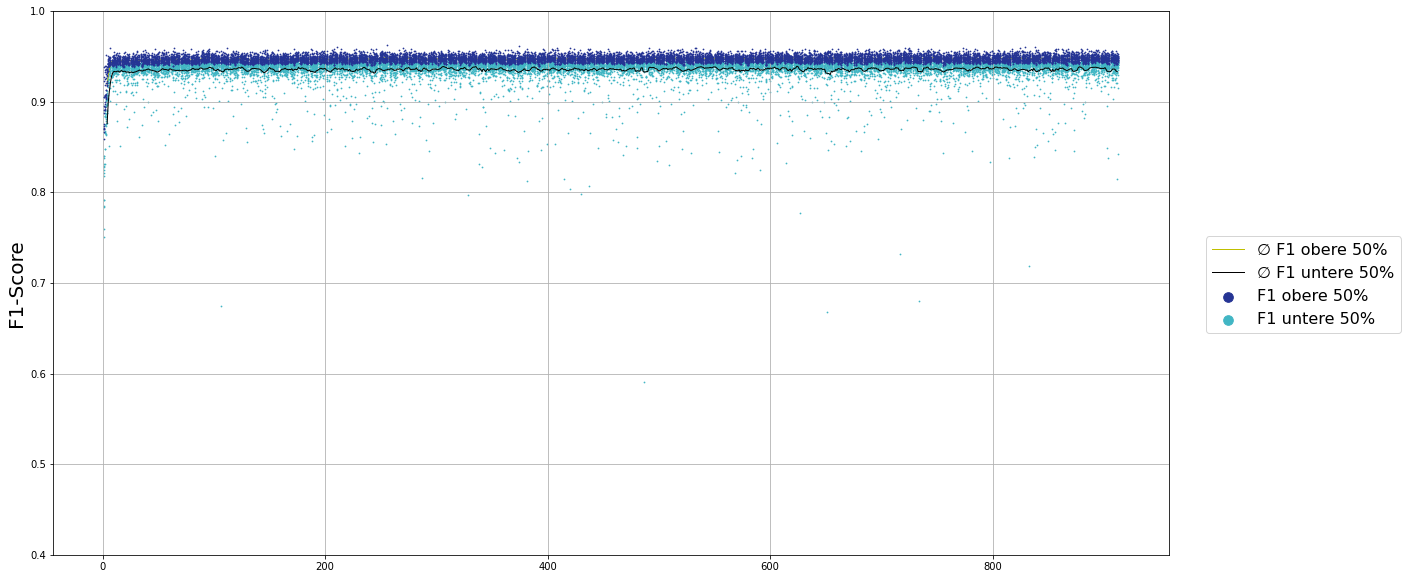

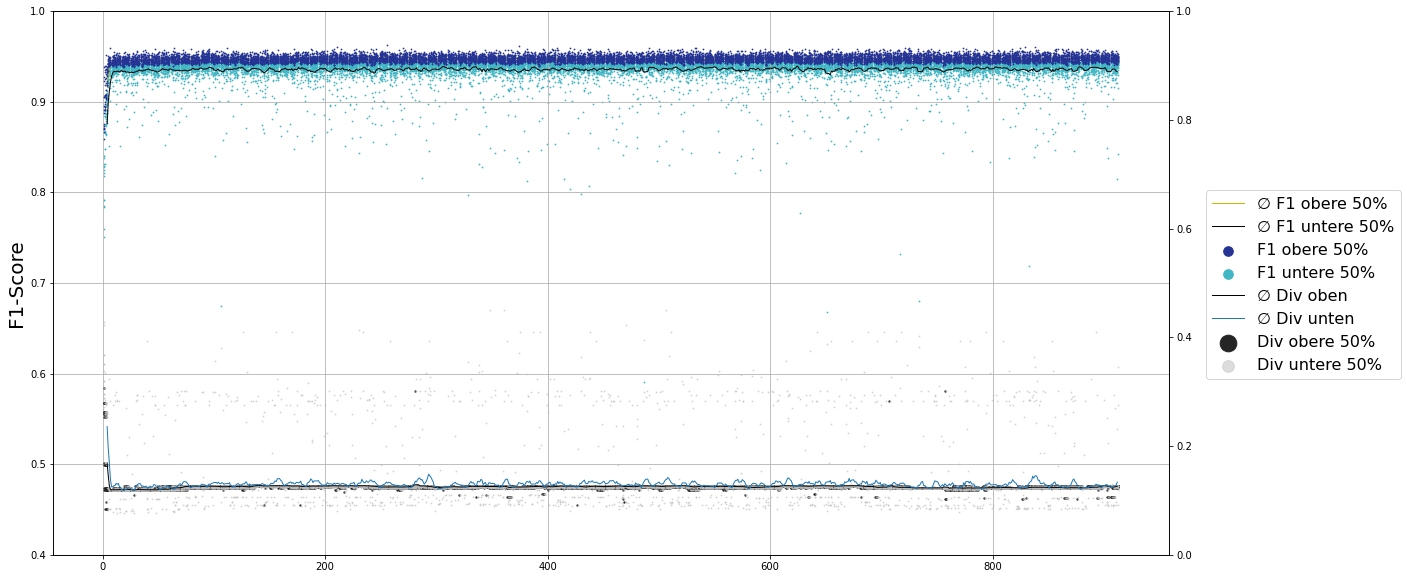

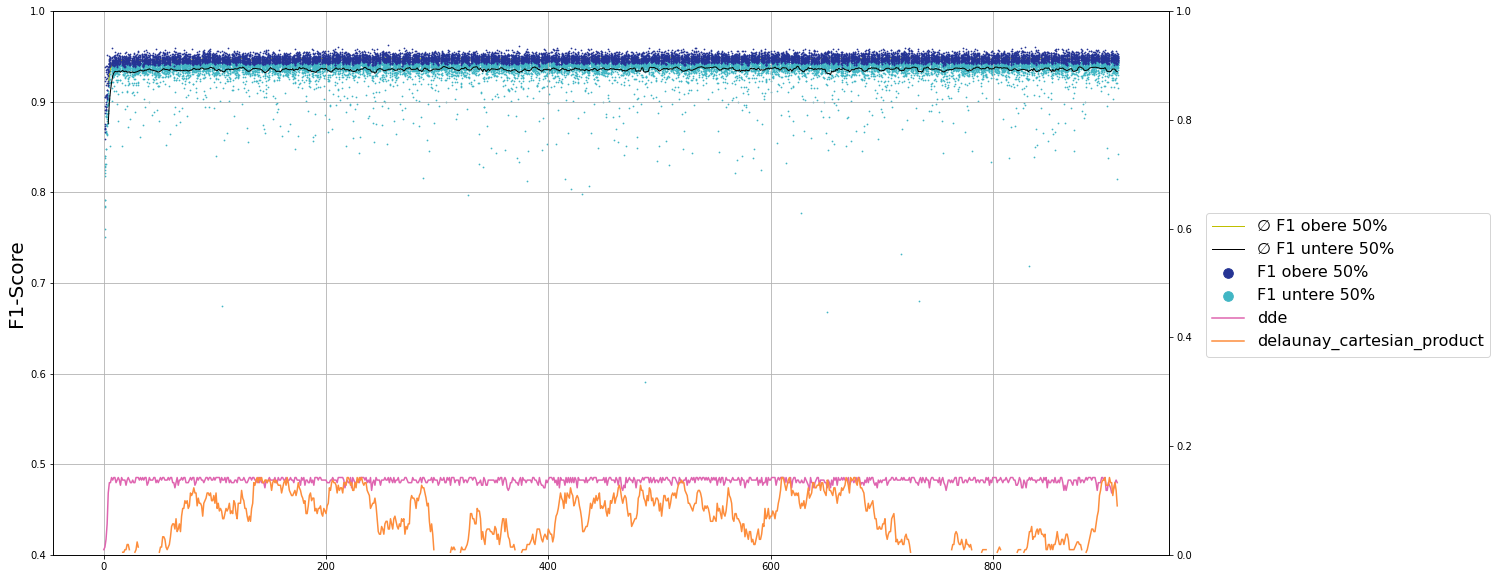

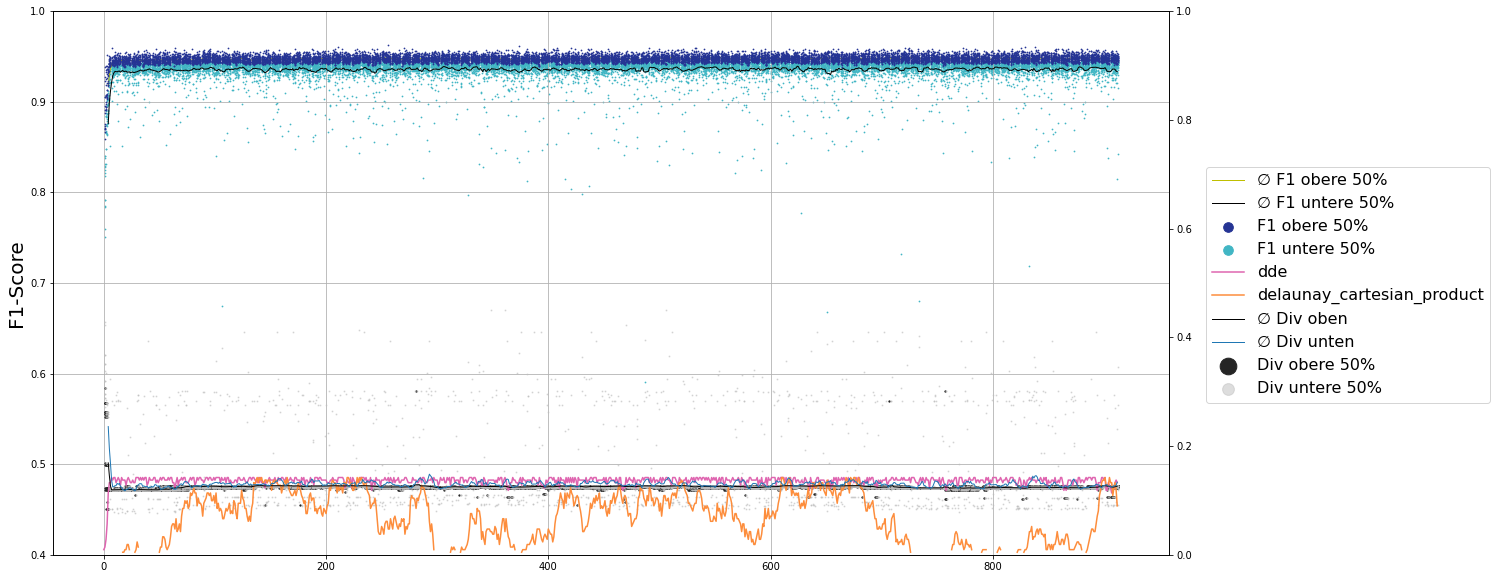

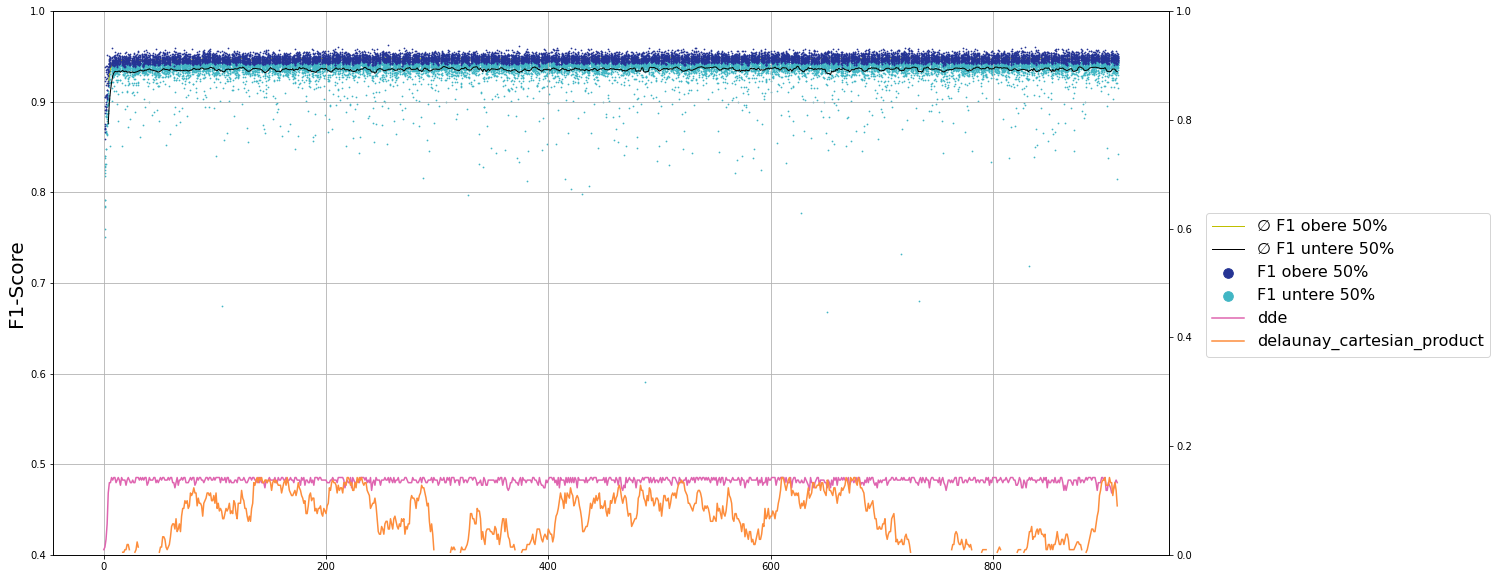

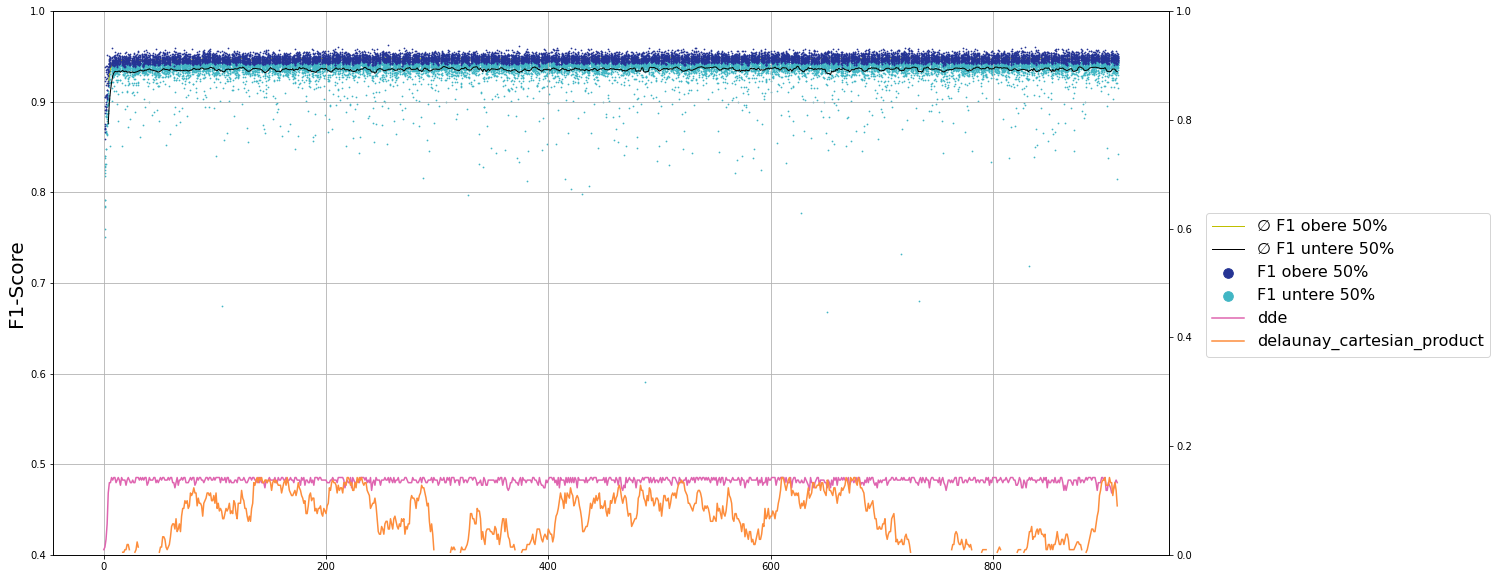

In [14]:
save_plots = False
#encos = ['both','seq','struc']
#f1,moving_mean_f1,RF_fraction,top_enc,enco_index,div,moving_mean_div,meta_cls,save,legend,shannon,show_encos
#to show put 1

f1 = [1,5,0,0,0,0,0,0,save_plots,1,0,1]
f1_div = [1,5,0,0,1,1,5,0,save_plots,1,0,1]
f1_top_enc_all = [1,5,0,1,1,0,0,0,save_plots,1,0,1]
f1_top_enc_all_div = [1,5,0,1,1,1,5,0,save_plots,1,0,1]
f1_top_enc_seq = [1,5,0,1,2,0,0,0,save_plots,1,0,3]
f1_top_enc_struc = [1,5,0,1,3,0,0,0,save_plots,1,2]
f1_meta = [1,1,0,0,0,0,0,1,save_plots,1,1]
f1_meta_enc_all = [1,1,0,1,1,0,0,1,save_plots,1,1]

all_shows =[f1,f1_div,f1_top_enc_all,f1_top_enc_all_div,f1_top_enc_seq,f1_top_enc_struc]

names = ["f1","f1_div","f1_top_enc_all","f1_top_enc_all_div","f1_top_enc_seq","f1_top_enc_struc"]

if stacking and with_meta:
        all_shows.extend([f1_meta,f1_meta_enc_all])
        names.extend(["f1_meta","f1_meta_enc_all"])

for show,name in zip(all_shows,names):
    print(name)
    params = set_params(show)
    plot_and_save(name,params)


In [15]:
### Diversity


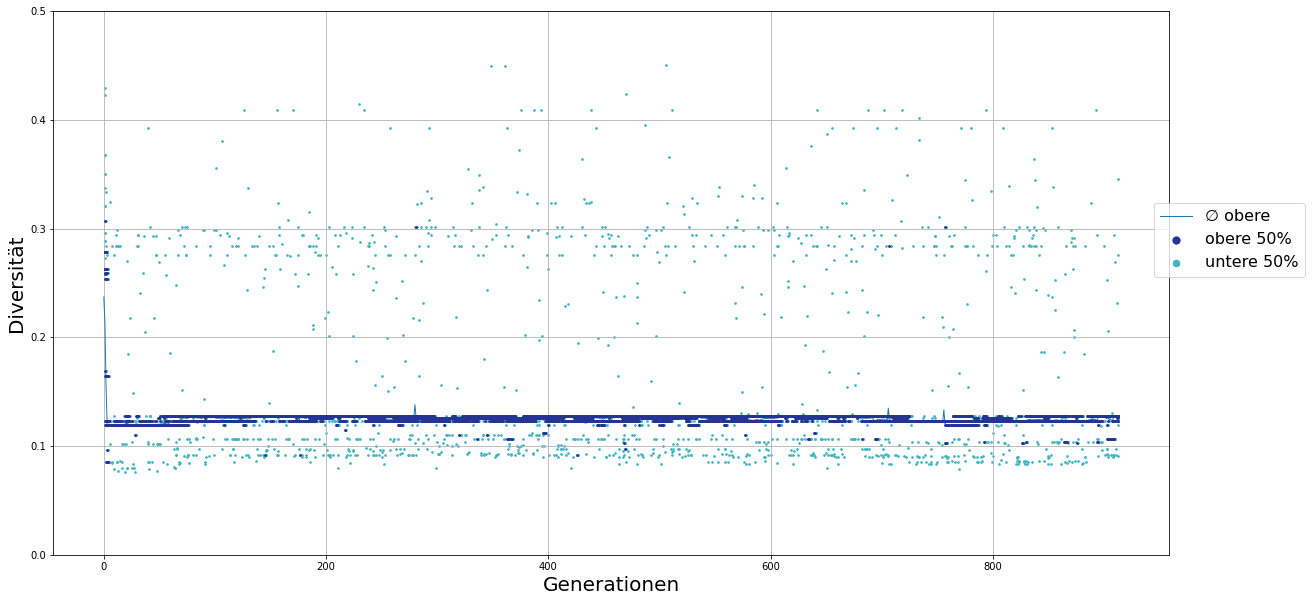

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
mean =1
fig, ax = plt.subplots(figsize = (20,10))
#ax.set_title('Diversität {} Generationen'.format(len(df.index.levels[0]))+" ("+stack+")", size= 30)

ax.scatter([[i]*int(len(df2.index.levels[1])/2) for i in df2.index.levels[0]], list(top_div), marker='.',c="#253494",zorder=4,s=12000/df2.index.levels[0].shape[0],label='obere 50%')
ax.scatter([[i]*int(len(df2.index.levels[1])/2) for i in df2.index.levels[0]], list(bot_div), marker='.',c="#41b6c4",zorder=1,s=10000/df2.index.levels[0].shape[0],label='untere 50%')

ax.set_ylim(0,0.5)

if mean ==1:
    ax.plot(range(len(df2.index.levels[0])), 
             mean_top_div, label= '∅ obere',linewidth=1)

    #ax.plot(range(len(df2.index.levels[0])), 
    #         mean_bot_div, label= '∅ untere',linewidth=1)

#ax2 = ax.twinx()
#ax2.set_ylabel('ratio', size = 20)
ax.set_xlabel('Generationen', size= 20)
ax.set_ylabel('Diversität', size = 20)
fig.legend(fontsize=16,markerscale=4,loc='lower right',bbox_to_anchor=(1,0.5))
ax.grid()

if save_plots:
    plt.savefig("Results/"+stack+"/"+re.sub("\.csv","",filename)+"_div"+".pdf", bbox_inches='tight')

pass

### Log distribution of all encodings used

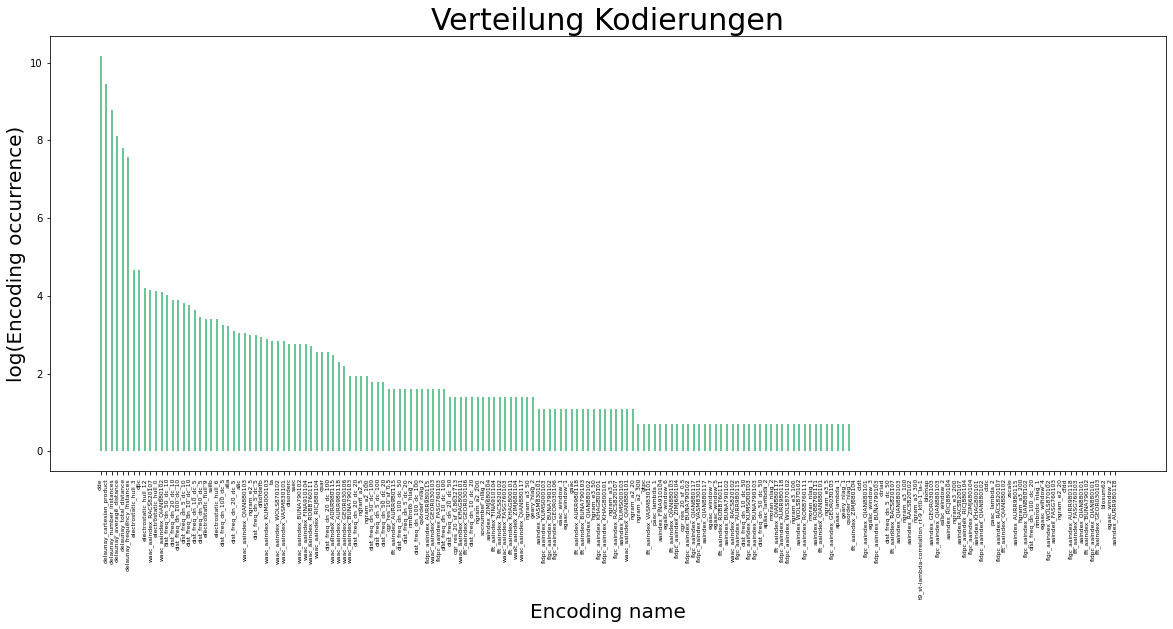

In [17]:
fig, ax = plt.subplots(figsize = (20,8))

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90,size=6)

ax.vlines(list([re.sub("\.csv","",x) for x in encoding_counts.index]), 
          ymin = 0,ymax=np.log(encoding_counts), color='mediumseagreen')

ax.set_ylabel('log(Encoding occurrence)', size = 20)
ax.set_xlabel('Encoding name',size = 20)
ax.set_title('Verteilung Kodierungen', size=30)

if save_plots:
    plt.savefig("Results/"+stack+"/"+re.sub("\.csv","",filename)+"_verteilung_kodierungen.pdf", bbox_inches='tight')


In [18]:
### Log distribution of structure based encodings used

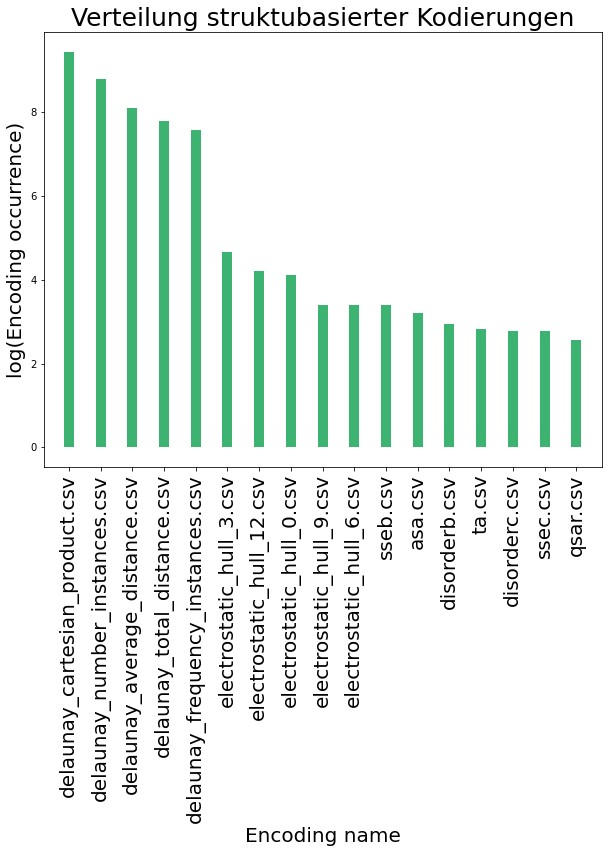

In [19]:
if not single_enc_struc:
    import re
    fig, ax = plt.subplots(figsize = (10,8))

    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90,size=20)

    ax.vlines(list([x for x in encoding_counts_struc.index]), 
              ymin = 0,ymax=np.log(encoding_counts_struc), color='mediumseagreen',linewidths=10)


    ax.set_ylabel('log(Encoding occurrence)', size = 20)
    ax.set_xlabel('Encoding name',size = 20)
    ax.set_title('Verteilung struktubasierter Kodierungen', size=25)
    if save_plots:
        plt.savefig("Results/"+stack+"/"+re.sub("\.csv","",filename)+"_verteilung_struk_kodierungen.pdf", bbox_inches='tight')


In [20]:
### Log distribution of sequence based encodings used

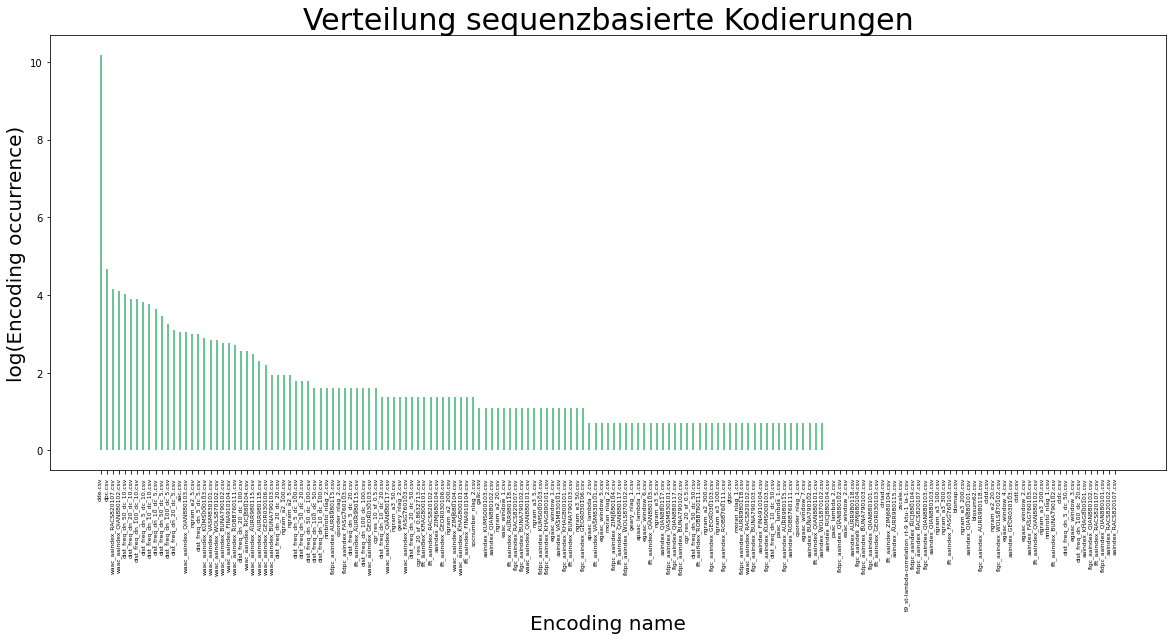

In [21]:
if not single_enc_struc:
    fig, ax = plt.subplots(figsize = (20,8))



    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90,size=6)

    ax.vlines(list(encoding_counts_seq.index), 
              ymin = 0,ymax=np.log(encoding_counts_seq), color='mediumseagreen')


    ax.set_ylabel('log(Encoding occurrence)', size = 20)
    ax.set_xlabel('Encoding name',size = 20)
    ax.set_title('Verteilung sequenzbasierte Kodierungen', size=30)
    if save_plots:
        plt.savefig("Results/"+stack+"/"+re.sub("\.csv","",filename)+"_verteilung_seq_kodierungen.pdf", bbox_inches='tight')


In [22]:
### Calculate Correlation

In [23]:

def calc_corr():
    methods = ["pearson"]
    correlations = pd.DataFrame(columns = methods)
    for method in methods:
        print(df.corr(method=method))
        correlations.at[0,method]=df.corr(method=method).iloc[0,-1]
    return correlations


In [24]:
### Calculate Final Evaluation

In [25]:
save_path = 'Results/all_final_results.csv'
try:
    df_res =  pd.read_csv("Results/"+stack+"/"+fold+"eval_scores.csv", sep=",")
    cols = df_res.columns
    new_cols = cols[:8].append(cols[9:])
    ind = pd.Index(new_cols.append(pd.Index([cols[8]])))
    df_res = df_res[ind]
    df_res.drop(columns=['Learned Div','Div Frac'],inplace=True)
    df_res = pd.concat([df_res, calc_corr()], axis=1, join='inner')
except FileNotFoundError:
    df_res = calc_corr()
df_res = pd.concat([df_res, pd.DataFrame({"path":[stack+"/"+filename]})], axis=1, join='inner')

if save_eval:
    header2 = True
    if os.path.exists(save_path):
        header2 = False
    df_res.to_csv(save_path, mode='a',header=header2)


               fitness_value    SVM_C0    SVM_C1     RF_n0     RF_n1  \
fitness_value       1.000000  0.043020  0.070517 -0.231397  0.303018   
SVM_C0              0.043020  1.000000  0.239586       NaN  0.334916   
SVM_C1              0.070517  0.239586  1.000000  0.195780       NaN   
RF_n0              -0.231397       NaN  0.195780  1.000000 -0.045534   
RF_n1               0.303018  0.334916       NaN -0.045534  1.000000   
SVM_gamma0               NaN       NaN       NaN       NaN       NaN   
SVM_gamma1               NaN       NaN       NaN       NaN       NaN   
diversity          -0.481913  0.014612 -0.047616  0.530309 -0.182618   

               SVM_gamma0  SVM_gamma1  diversity  
fitness_value         NaN         NaN  -0.481913  
SVM_C0                NaN         NaN   0.014612  
SVM_C1                NaN         NaN  -0.047616  
RF_n0                 NaN         NaN   0.530309  
RF_n1                 NaN         NaN  -0.182618  
SVM_gamma0            NaN         NaN        

In [26]:
encos =['dist_freq_dn_20_dc_20', 'dpc', 'dist_freq_dn_20_dc_50', 'aaindex_BUNA790103']
pre_div_path = '/Users/amvaon/Documents/Uni/BA/evolutionary-optimization-of-ensemble-classifiers-master/data/imo/encoding_distances/all_vs_all_div.csv'
diversity_matrix = pd.read_csv(pre_div_path)
diversity_matrix = diversity_matrix.set_index('Unnamed: 0')
z = 0
div = 0
n = range(len(encos))
for i in n:
    for j in n:
        if i == j:
            break
        else:
            z+=1
            div += diversity_matrix.loc[encos[i],encos[j]]
print(div/z)


0.13475511826674616


In [27]:
###F1 vs Div

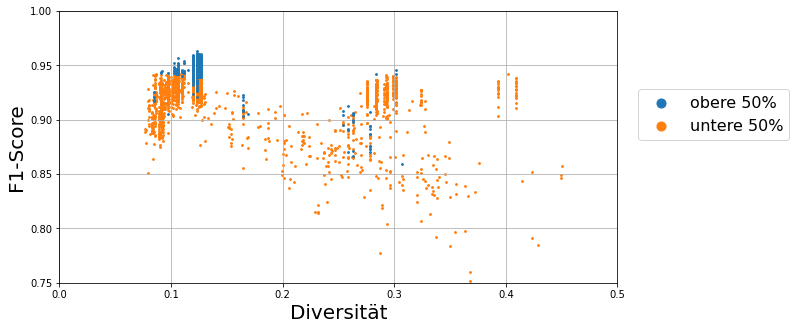

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# save_extra = True
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(list(top_div), list(top_fit), marker='.',zorder=4,s=12000/df2.index.levels[0].shape[0],label='obere 50%')
ax.scatter(list(bot_div), list(bot_fit), marker='.',zorder=1,s=12000/df2.index.levels[0].shape[0],label='untere 50%')
ax.set_ylim(0.75,1)
ax.set_xlim(0,0.5)

ax.set_xlabel('Diversität', size= 20)
ax.set_ylabel('F1-Score', size = 20)
fig.legend(fontsize=16,markerscale=5,loc='lower right',bbox_to_anchor=(1.15,0.5))
ax.grid()

if save_extra:
    plt.savefig("Results/"+stack+"/"+re.sub("\.csv","",filename)+"_f1_vs_div.pdf", bbox_inches='tight')

pass